In [1]:
# Packages imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
%matplotlib inline

In [2]:
# load ratings
ratings = pd.read_csv('BX-Book-Ratings.csv', encoding='cp1251', sep=';')
ratings = ratings[ratings['Book-Rating']!=0]

In [3]:
# load books
books = pd.read_csv('BX-Books.csv',  encoding='cp1251', sep=';',error_bad_lines=False)
# Take a look at the data
ratings.head()

b'Skipping line 6452: expected 8 fields, saw 9\nSkipping line 43667: expected 8 fields, saw 10\nSkipping line 51751: expected 8 fields, saw 9\n'
b'Skipping line 92038: expected 8 fields, saw 9\nSkipping line 104319: expected 8 fields, saw 9\nSkipping line 121768: expected 8 fields, saw 9\n'
b'Skipping line 144058: expected 8 fields, saw 9\nSkipping line 150789: expected 8 fields, saw 9\nSkipping line 157128: expected 8 fields, saw 9\nSkipping line 180189: expected 8 fields, saw 9\nSkipping line 185738: expected 8 fields, saw 9\n'
b'Skipping line 209388: expected 8 fields, saw 9\nSkipping line 220626: expected 8 fields, saw 9\nSkipping line 227933: expected 8 fields, saw 11\nSkipping line 228957: expected 8 fields, saw 10\nSkipping line 245933: expected 8 fields, saw 9\nSkipping line 251296: expected 8 fields, saw 9\nSkipping line 259941: expected 8 fields, saw 9\nSkipping line 261529: expected 8 fields, saw 9\n'
c:\users\moro\appdata\local\programs\python\python36-32\lib\site-packages\

,User-ID,ISBN,Book-Rating
1,276726,0155061224,5
3,276729,052165615X,3
4,276729,0521795028,6
6,276736,3257224281,8
7,276737,0600570967,6


In [4]:
# Get the dataset information
ratings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 433671 entries, 1 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   User-ID      433671 non-null  int64 
 1   ISBN         433671 non-null  object
 2   Book-Rating  433671 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 11.6+ MB


In [5]:
# Number of users
print('The ratings dataset has', ratings['User-ID'].nunique(), 'unique users')
# Number of books
print('The ratings dataset has', ratings['ISBN'].nunique(), 'unique books')
# Number of ratings
print('The ratings dataset has', ratings['Book-Rating'].nunique(), 'unique ratings')
# List of unique ratings
print('The unique ratings are', sorted(ratings['Book-Rating'].unique()))

The ratings dataset has 77805 unique users
The ratings dataset has 185973 unique books
The ratings dataset has 10 unique ratings
The unique ratings are [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


In [6]:
# Take a look at the data
books.head(5)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [7]:
# Merge ratings and books datasets
df = pd.merge(ratings, books, on='ISBN', how='inner')
# Take a look at the data
df.head()

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,276726,0155061224,5,Rites of Passage,Judith Rae,2001,Heinle,http://images.amazon.com/images/P/0155061224.0...,http://images.amazon.com/images/P/0155061224.0...,http://images.amazon.com/images/P/0155061224.0...
1,276729,052165615X,3,Help!: Level 1,Philip Prowse,1999,Cambridge University Press,http://images.amazon.com/images/P/052165615X.0...,http://images.amazon.com/images/P/052165615X.0...,http://images.amazon.com/images/P/052165615X.0...
2,276729,0521795028,6,The Amsterdam Connection : Level 4 (Cambridge ...,Sue Leather,2001,Cambridge University Press,http://images.amazon.com/images/P/0521795028.0...,http://images.amazon.com/images/P/0521795028.0...,http://images.amazon.com/images/P/0521795028.0...
3,276744,038550120X,7,A Painted House,JOHN GRISHAM,2001,Doubleday,http://images.amazon.com/images/P/038550120X.0...,http://images.amazon.com/images/P/038550120X.0...,http://images.amazon.com/images/P/038550120X.0...
4,11676,038550120X,10,A Painted House,JOHN GRISHAM,2001,Doubleday,http://images.amazon.com/images/P/038550120X.0...,http://images.amazon.com/images/P/038550120X.0...,http://images.amazon.com/images/P/038550120X.0...


In [8]:
ratings = pd.DataFrame(df.groupby('Book-Title')['Book-Rating'].mean())
ratings.head()

,Book-Rating
Book-Title,
"A Light in the Storm: The Civil War Diary of Amelia Martin, Fenwick Island, Delaware, 1861 (Dear America)",9.000000
"Ask Lily (Young Women of Faith: Lily Series, Book 5)",8.000000
Dark Justice,10.000000
"Earth Prayers From around the World: 365 Prayers, Poems, and Invocations for Honoring the Earth",7.142857
Final Fantasy Anthology: Official Strategy Guide (Brady Games),10.000000


In [9]:
ratings['total_ratings'] = pd.DataFrame(df.groupby('Book-Title')['Book-Rating'].count())
ratings.head()

,Book-Rating,total_ratings
Book-Title,,
"A Light in the Storm: The Civil War Diary of Amelia Martin, Fenwick Island, Delaware, 1861 (Dear America)",9.000000,1
"Ask Lily (Young Women of Faith: Lily Series, Book 5)",8.000000,1
Dark Justice,10.000000,1
"Earth Prayers From around the World: 365 Prayers, Poems, and Invocations for Honoring the Earth",7.142857,7
Final Fantasy Anthology: Official Strategy Guide (Brady Games),10.000000,2


<AxesSubplot:>

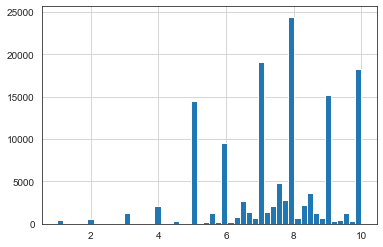

In [10]:
ratings['Book-Rating'].hist(bins=50)

<AxesSubplot:>

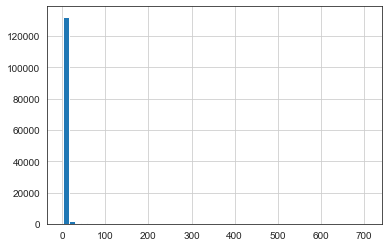

In [11]:
ratings['total_ratings'].hist(bins=50)

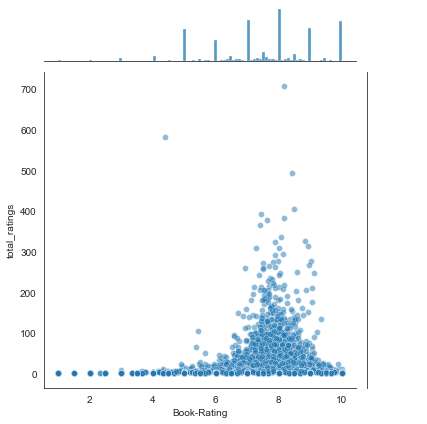

In [12]:
sns.jointplot(x='Book-Rating',y='total_ratings',data=ratings,alpha=0.5)

In [13]:
# Aggregate by book
agg_ratings = df.groupby('Book-Title').agg(mean_rating = ('Book-Rating', 'mean'),
                                                number_of_ratings = ('Book-Rating', 'count')).reset_index()
# Keep the books with over 100 ratings
agg_ratings_100 = agg_ratings[agg_ratings['number_of_ratings']>100]
# Check the information of the dataframe
agg_ratings_100.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 192 entries, 441 to 135435
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Book-Title         192 non-null    object 
 1   mean_rating        192 non-null    float64
 2   number_of_ratings  192 non-null    int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 5.2+ KB


In [14]:
# Check popular books
agg_ratings_100.sort_values(by='number_of_ratings', ascending=False).head()

,Book-Title,mean_rating,number_of_ratings
110229,The Lovely Bones: A Novel,8.185290,707
132241,Wild Animus,4.390706,581
102703,The Da Vinci Code,8.439271,494
116196,The Secret Life of Bees,8.477833,406
111950,The Nanny Diaries: A Novel,7.437659,393


In [15]:
df_100 = pd.merge(df, agg_ratings_100[['Book-Title']], on='Book-Title', how='inner')
df_100.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33641 entries, 0 to 33640
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   User-ID              33641 non-null  int64 
 1   ISBN                 33641 non-null  object
 2   Book-Rating          33641 non-null  int64 
 3   Book-Title           33641 non-null  object
 4   Book-Author          33641 non-null  object
 5   Year-Of-Publication  33641 non-null  object
 6   Publisher            33641 non-null  object
 7   Image-URL-S          33641 non-null  object
 8   Image-URL-M          33641 non-null  object
 9   Image-URL-L          33641 non-null  object
dtypes: int64(2), object(8)
memory usage: 1.8+ MB


In [16]:
# Create user-item matrix
matrix = df_100.pivot_table(index='User-ID', columns='Book-Title', values='Book-Rating')
matrix.head(10)

Book-Title,1984,1st to Die: A Novel,2nd Chance,A Bend in the Road,"A Child Called \It\"": One Child's Courage to Survive""",A Heartbreaking Work of Staggering Genius,A Is for Alibi (Kinsey Millhone Mysteries (Paperback)),A Map of the World,A Painted House,A Prayer for Owen Meany,...,Watership Down,We Were the Mulvaneys,When the Wind Blows,Where the Heart Is (Oprah's Book Club (Paperback)),While I Was Gone,White Oleander : A Novel,White Oleander : A Novel (Oprah's Book Club),Wicked: The Life and Times of the Wicked Witch of the West,Wild Animus,"\O\"" Is for Outlaw"""
User-ID,,,,,,,,,,,,,,,,,,,,,
16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
91,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
114,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
165,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
183,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
# Now one book is chosen
book_ratings = matrix['Insomnia']
book_ratings.head()

User-ID
16   NaN
26   NaN
32   NaN
51   NaN
91   NaN
Name: Insomnia, dtype: float64

In [18]:
# Correlations between the others books
similar_book_ratings = matrix.corrwith(book_ratings)

c:\users\moro\appdata\local\programs\python\python36-32\lib\site-packages\numpy\lib\function_base.py:2551: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
c:\users\moro\appdata\local\programs\python\python36-32\lib\site-packages\numpy\lib\function_base.py:2480: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [19]:
correlation = pd.DataFrame(similar_book_ratings,columns=['Correlation'])
correlation.dropna(inplace=True)
correlation.head()

,Correlation
Book-Title,
1984,0.817389
1st to Die: A Novel,0.474045
2nd Chance,-0.909935
A Bend in the Road,-0.755929
"A Child Called \It\"": One Child's Courage to Survive""",-0.102062


In [20]:
# Result dataframe
correlation.sort_values('Correlation',ascending=False).head()

,Correlation
Book-Title,
Outlander,1.0
White Oleander : A Novel (Oprah's Book Club),1.0
Isle of Dogs,1.0
Two for the Dough,1.0
Tara Road,1.0


In [22]:
# Library versions
from platform import python_version
print('Python version:' + python_version())
print('Pandas version:' + pd.__version__)
print('Numpy version:' + np.__version__)
print('Seaborn version:' + sns.__version__)

Python version:3.6.1
Pandas version:1.1.5
Numpy version:1.19.5
Seaborn version:0.11.2
